## ecommerce-fraud-data

In [ ]:
# https://www.kaggle.com/aryanrastogi7767/ecommerce-fraud-data

## WORKFLOW

In [7]:
## import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Data Acquisition / crawling using Selenium / Beautiful Soup

In [8]:
## Covert to csv / pandas dataframe
df1 = pd.read_csv('ef01.csv')
df2 = pd.read_csv('ef02.csv')

print(df1.shape)
print(df2.shape)

(623, 11)
(168, 10)


In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        623 non-null    int64 
 1   customerEmail                     623 non-null    object
 2   transactionId                     623 non-null    object
 3   orderId                           623 non-null    object
 4   paymentMethodId                   623 non-null    object
 5   paymentMethodRegistrationFailure  623 non-null    int64 
 6   paymentMethodType                 623 non-null    object
 7   paymentMethodProvider             623 non-null    object
 8   transactionAmount                 623 non-null    int64 
 9   transactionFailed                 623 non-null    int64 
 10  orderState                        623 non-null    object
dtypes: int64(4), object(7)
memory usage: 53.7+ KB


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              168 non-null    int64 
 1   customerEmail           168 non-null    object
 2   customerPhone           168 non-null    object
 3   customerDevice          168 non-null    object
 4   customerIPAddress       168 non-null    object
 5   customerBillingAddress  168 non-null    object
 6   No_Transactions         168 non-null    int64 
 7   No_Orders               168 non-null    int64 
 8   No_Payments             168 non-null    int64 
 9   Fraud                   168 non-null    bool  
dtypes: bool(1), int64(4), object(5)
memory usage: 12.1+ KB


In [11]:
df1.head(5)

,Unnamed: 0,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled


In [12]:
df2.head(5)

,Unnamed: 0,customerEmail,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,evansjeffery@yahoo.com,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
2,2,andersonwilliam@yahoo.com,024.420.0375,4m7h5ipl1shyavt6vv2r,67b7:3db8:67e0:3bea:b9d0:90c1:2b60:b9f0,"8478 Sean Ridges Apt. 441\nDavisberg, PR 72250",5,3,2,False
3,3,rubenjuarez@yahoo.com,670.664.8168x94985,slovx60t0i558may4ks0,95de:8565:5a66:792c:26e0:6cfb:7d87:11af,"7769 Elizabeth Bridge Apt. 343\nNortonstad, FM...",3,3,1,False
4,4,uchen@malone.com,1-981-877-0870,j0pd24k5h8dl2fqu0cz4,196.89.235.192,"148 Russell Lodge Apt. 445\nPort Jenniferside,...",7,7,6,True


In [21]:
df = pd.merge(df1,df2,how='left',on='customerEmail')
df

,Unnamed: 0_x,customerEmail,transactionId,orderId,paymentMethodId,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,Unnamed: 0_y,customerPhone,customerDevice,customerIPAddress,customerBillingAddress,No_Transactions,No_Orders,No_Payments,Fraud
0,0,josephhoward@yahoo.com,a9lcj51r,vjbdvd,wt07xm68b,1,card,JCB 16 digit,18,0,pending,0,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
1,1,josephhoward@yahoo.com,y4wcv03i,yp6x27,wt07xm68b,1,card,JCB 16 digit,26,0,fulfilled,0,400-108-5415,yyeiaxpltf82440jnb3v,8.129.104.40,"5493 Jones Islands\nBrownside, CA 51896",2,2,1,False
2,2,evansjeffery@yahoo.com,5mi94sfw,nlghpa,41ug157xz,0,bitcoin,American Express,45,0,fulfilled,1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
3,3,evansjeffery@yahoo.com,br8ba1nu,uw0eeb,41ug157xz,0,bitcoin,American Express,23,0,fulfilled,1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
4,4,evansjeffery@yahoo.com,a33145ss,bn44oh,y3xp697jx,1,bitcoin,VISA 16 digit,43,1,fulfilled,1,1-788-091-7546,r0jpm7xaeqqa3kr6mzum,219.173.211.202,356 Elizabeth Inlet Suite 120\nPort Joshuabury...,3,3,7,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,618,dawn05@tucker-brown.com,7yilsi1o,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,1,fulfilled,167,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False
815,619,dawn05@tucker-brown.com,c82k5bcv,1bubxa,7yen1m1q8,0,card,VISA 13 digit,25,0,fulfilled,167,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False
816,620,dawn05@tucker-brown.com,wmh52bns,1bubxa,3zmkegkb8,0,paypal,JCB 15 digit,25,1,fulfilled,167,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False
817,621,dawn05@tucker-brown.com,xdw33hfp,p0gdbf,3zmkegkb8,0,paypal,JCB 15 digit,19,0,fulfilled,167,(089)703-7360x8848,lu4fgcug8dr0dwbcuui1,132.132.95.33,"130 Kimberly Junctions\nEricmouth, KS 59756-2919",7,5,4,False


In [24]:
dff = df.drop(columns=["customerBillingAddress", "paymentMethodId", "transactionId", "orderId", "Unnamed: 0_x", "Unnamed: 0_y", "customerPhone", "customerDevice" , "customerIPAddress"])
dff

,customerEmail,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,No_Transactions,No_Orders,No_Payments,Fraud
0,josephhoward@yahoo.com,1,card,JCB 16 digit,18,0,pending,2,2,1,False
1,josephhoward@yahoo.com,1,card,JCB 16 digit,26,0,fulfilled,2,2,1,False
2,evansjeffery@yahoo.com,0,bitcoin,American Express,45,0,fulfilled,3,3,7,True
3,evansjeffery@yahoo.com,0,bitcoin,American Express,23,0,fulfilled,3,3,7,True
4,evansjeffery@yahoo.com,1,bitcoin,VISA 16 digit,43,1,fulfilled,3,3,7,True
...,...,...,...,...,...,...,...,...,...,...,...
814,dawn05@tucker-brown.com,0,card,VISA 13 digit,25,1,fulfilled,7,5,4,False
815,dawn05@tucker-brown.com,0,card,VISA 13 digit,25,0,fulfilled,7,5,4,False
816,dawn05@tucker-brown.com,0,paypal,JCB 15 digit,25,1,fulfilled,7,5,4,False
817,dawn05@tucker-brown.com,0,paypal,JCB 15 digit,19,0,fulfilled,7,5,4,False


In [25]:
# look at all of the values in each col. & get a count
for val in dff:
    print(dff[val].value_counts())
    print()

johnlowery@gmail.com           224
mitchellgriffith@yahoo.com      15
tmcpherson@wright.com           13
lleonard@turner-fleming.com     11
david45@gmail.com               10
                              ... 
mtrevino@gutierrez.net           1
deborah38@yahoo.com              1
vreyes@cruz.info                 1
uguzman@yahoo.com                1
robinsoncynthia@dunn.com         1
Name: customerEmail, Length: 136, dtype: int64

0    737
1     82
Name: paymentMethodRegistrationFailure, dtype: int64

card         647
bitcoin       68
paypal        55
apple pay     49
Name: paymentMethodType, dtype: int64

JCB 16 digit                   167
VISA 16 digit                  166
Maestro                        104
Voyager                         82
American Express                66
VISA 13 digit                   58
Diners Club / Carte Blanche     58
JCB 15 digit                    45
Discover                        41
Mastercard                      32
Name: paymentMethodProvider, dtype: in

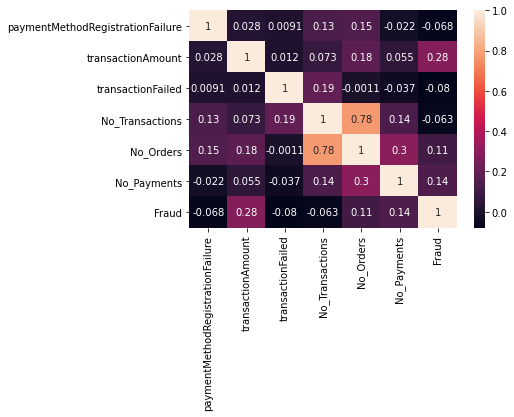

In [27]:
## to see any correlation between each features
corrMatrix = dff.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [46]:
# EDA 1: customerEmail vs Fraud
dff1 = dff.groupby(['customerEmail','Fraud']).agg({'transactionAmount':'count'})
dff2 = dff1.reset_index()
dff3 = dff2.sort_values('transactionAmount',ascending=False)
dff4 = dff3.rename(columns={'transactionAmount':'no_of_counts'})
dff5 = dff4.loc[dff4['Fraud']==True]
top5fraudid = dff5.head(5)
top5fraudid

,customerEmail,Fraud,no_of_counts
60,johnlowery@gmail.com,True,224
119,tmcpherson@wright.com,True,13
76,lleonard@turner-fleming.com,True,11
0,1yf0@jedyz63t,True,10
127,vmiller@hotmail.com,True,10


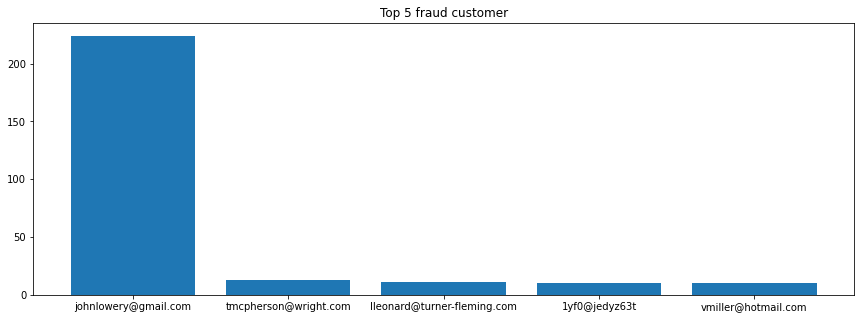

In [48]:
# It showed that the customerEmail: johnlowery@gmail.com is a fraud ID which has total 224
plt.figure(figsize=(50, 5))
plt.subplot(131)
plt.bar(top5fraudid.customerEmail,top5fraudid.no_of_counts)
plt.title('Top 5 fraud customer')
plt.show()

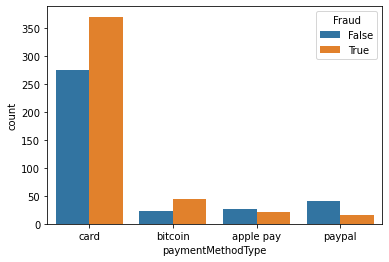

In [50]:
# EDA 2: paymentMethodType vs Fraud : Most majority used card for the payment
sns.countplot(x="paymentMethodType", hue="Fraud", data=dff)

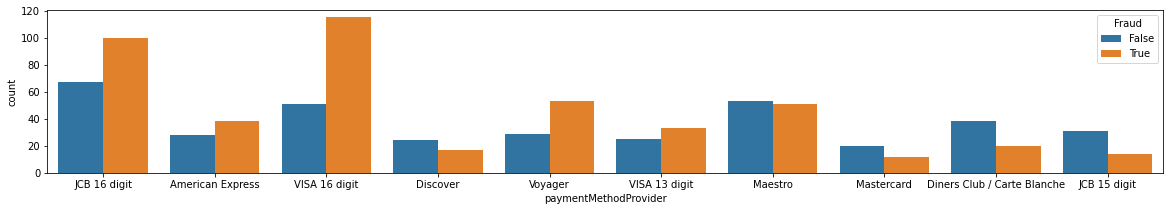

In [57]:
# EDA 3: paymentMethodProvider vs Fraud
plt.figure(figsize=(20,3))
sns.countplot(x="paymentMethodProvider", hue="Fraud", data=dff)

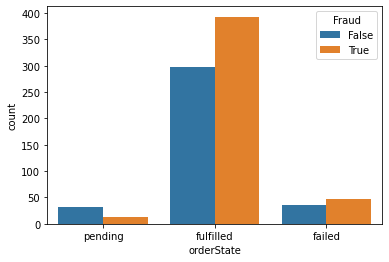

In [60]:
# EDA 4: orderState vs Fraud
sns.countplot(x="orderState", hue="Fraud", data=dff)

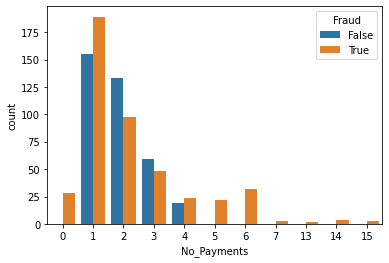

In [61]:
# EDA 5: No_Payments vs Fraud : It showed that It must be a fraud if the number of payment is great than 4. 
sns.countplot(x="No_Payments", hue="Fraud", data=dff)

In [ ]:
## Data Feature Engineering - fillna, drop cols / row, select useful features

In [62]:
## check for any missing values 
dff.isnull().values.any()

False

In [72]:
# replace False to 0, True to 1
dff['Fraud_']=dff['Fraud'].replace(False,0)
dff['Fraud_']=dff['Fraud_'].replace(True,1)
dff

,customerEmail,paymentMethodRegistrationFailure,paymentMethodType,paymentMethodProvider,transactionAmount,transactionFailed,orderState,No_Transactions,No_Orders,No_Payments,Fraud,Fraud_
0,josephhoward@yahoo.com,1,card,JCB 16 digit,18,0,pending,2,2,1,False,0.0
1,josephhoward@yahoo.com,1,card,JCB 16 digit,26,0,fulfilled,2,2,1,False,0.0
2,evansjeffery@yahoo.com,0,bitcoin,American Express,45,0,fulfilled,3,3,7,True,1.0
3,evansjeffery@yahoo.com,0,bitcoin,American Express,23,0,fulfilled,3,3,7,True,1.0
4,evansjeffery@yahoo.com,1,bitcoin,VISA 16 digit,43,1,fulfilled,3,3,7,True,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
814,dawn05@tucker-brown.com,0,card,VISA 13 digit,25,1,fulfilled,7,5,4,False,0.0
815,dawn05@tucker-brown.com,0,card,VISA 13 digit,25,0,fulfilled,7,5,4,False,0.0
816,dawn05@tucker-brown.com,0,paypal,JCB 15 digit,25,1,fulfilled,7,5,4,False,0.0
817,dawn05@tucker-brown.com,0,paypal,JCB 15 digit,19,0,fulfilled,7,5,4,False,0.0


In [74]:
cols = ['paymentMethodRegistrationFailure','paymentMethodType','paymentMethodProvider','transactionAmount','orderState','No_Transactions','No_Orders','No_Payments']
X = dff[cols]
y = dff['Fraud_']
print(X.shape)
print(y.shape)

(819, 8)
(819,)


In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 819 entries, 0 to 818
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   paymentMethodRegistrationFailure  819 non-null    int64 
 1   paymentMethodType                 819 non-null    object
 2   paymentMethodProvider             819 non-null    object
 3   transactionAmount                 819 non-null    int64 
 4   orderState                        819 non-null    object
 5   No_Transactions                   819 non-null    int64 
 6   No_Orders                         819 non-null    int64 
 7   No_Payments                       819 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 97.6+ KB


In [76]:
## get_dummies for categorical data 
x = pd.get_dummies(X,columns=['paymentMethodType','paymentMethodProvider','orderState'])

In [77]:
## Train test split
from sklearn.model_selection import train_test_split
XX_train, XX_test, YY_train, YY_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [78]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [80]:
## Train Model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=5000)
lr.fit(XX_train, YY_train)

from sklearn.svm import SVC
svc_lin = SVC(kernel='linear',random_state=0)
svc_lin.fit(XX_train, YY_train)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(XX_train, YY_train)

print('Logistic Regression Training Accuracy: ', lr.score(XX_train, YY_train))
print('SVC Linear Training Accuracy: ', svc_lin.score(XX_train, YY_train))
print('K Neighbors Training Accuracy: ', knn.score(XX_train, YY_train))

Logistic Regression Training Accuracy:  0.7038167938931298
SVC Linear Training Accuracy:  0.7083969465648855
K Neighbors Training Accuracy:  0.8458015267175573


In [81]:
## Prediction
y_pred_lr = lr.predict(XX_test)
y_pred_svc = svc_lin.predict(XX_test)
y_pred_knn = knn.predict(XX_test)

In [83]:
## Model performance Evaluation

class_report_lr = classification_report(YY_test, y_pred_lr)
class_report_svc = classification_report(YY_test, y_pred_svc)
class_report_knn = classification_report(YY_test, y_pred_knn)

print(class_report_lr)
print()
print(class_report_svc)
print()
print(class_report_knn)

              precision    recall  f1-score   support

         0.0       0.59      0.63      0.61        68
         1.0       0.73      0.69      0.71        96

    accuracy                           0.66       164
   macro avg       0.66      0.66      0.66       164
weighted avg       0.67      0.66      0.67       164


              precision    recall  f1-score   support

         0.0       0.59      0.51      0.55        68
         1.0       0.69      0.75      0.72        96

    accuracy                           0.65       164
   macro avg       0.64      0.63      0.63       164
weighted avg       0.65      0.65      0.65       164


              precision    recall  f1-score   support

         0.0       0.74      0.71      0.72        68
         1.0       0.80      0.82      0.81        96

    accuracy                           0.77       164
   macro avg       0.77      0.76      0.77       164
weighted avg       0.77      0.77      0.77       164



In [112]:
import xgboost as xgb
dtrain = xgb.DMatrix(XX_train,label=YY_train)
dtest = xgb.DMatrix(XX_test,label=YY_test)
param = {'max_depth':10,'eta':0.5,'gamma':0.2,'objective':'multi:softmax','num_class':2}
bst = xgb.train(param,dtrain)
y_pred_xgb = bst.predict(dtest)
accu_xgb = accuracy_score(YY_test,y_pred_xgb)
print("Accuracy : ", accu_xgb)

Accuracy :  0.9329268292682927


## Conclusion

In [ ]:
# In this demo, using xgboost could get a 93% accuracy which is the highest comparing with other models. However, there are total 168 cases showed wheather it is a fraud or not.

In [ ]:
# Any business insights or follow up actions ?
# 1. Using Card and Bitcoin as a payment method get higher fraudulent rate => think of any authentication during transaction.
# 2. Introduce biometrics to reduce fraud